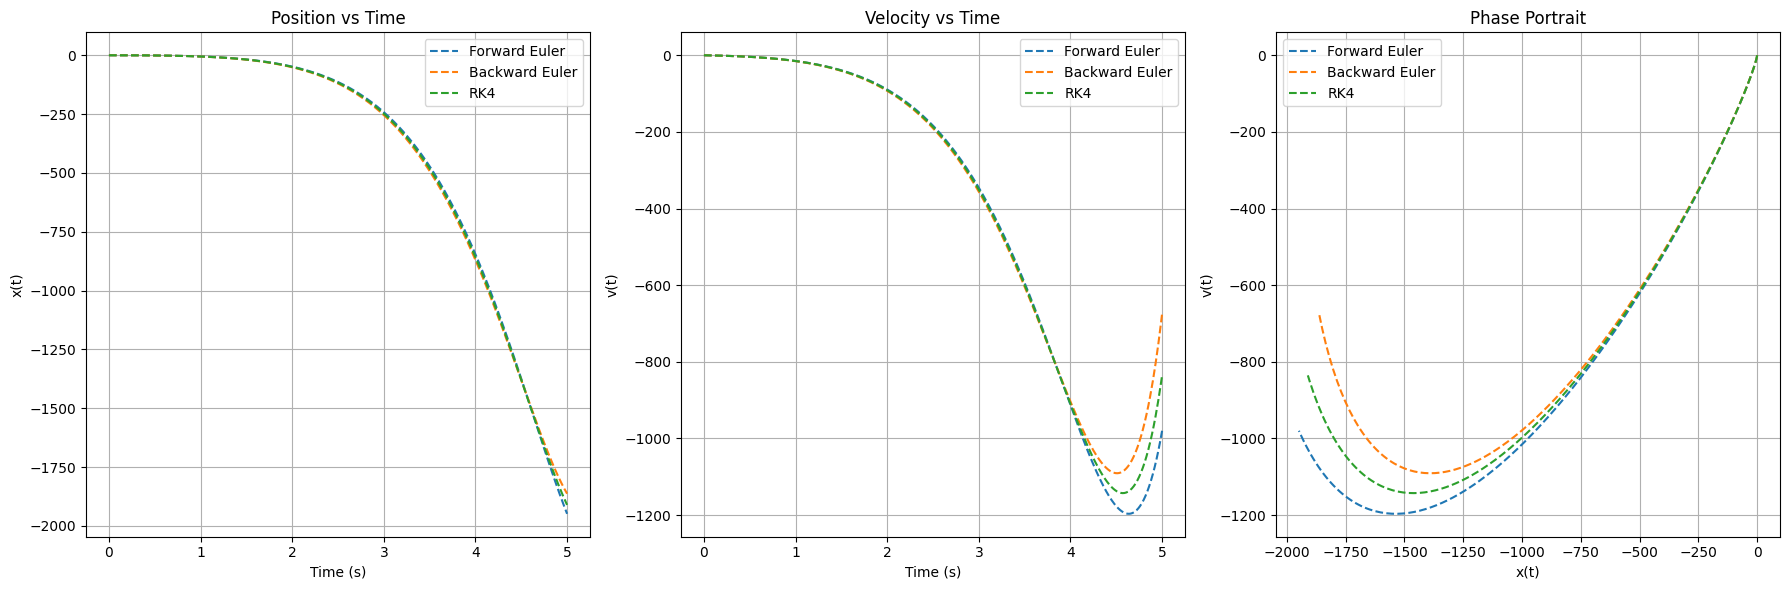

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 1
b = -2.5876
c = 2.0257
d = -4.1855

# Initial conditions 
x0 = 0.1
v0 = 0.0
X0 = np.array([x0, v0])

Tf = 5.0  
h = 0.01

# Dynamics function for numerical solvers
def ode_dynamics(x):
    x1, x2 = x
    dx1 = x2
    dx2 = (d - b * x2 - c * x1) / a
    return np.array([dx1, dx2])

# Integrators 
def forward_euler(fun, x0, Tf, h):
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])
    return x_hist, t

def backward_euler(fun, x0, Tf, h, tol=1e-8, max_iter=100):
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k]  
        for i in range(max_iter):
            x_next = x_hist[:, k] + h * fun(x_hist[:, k + 1])
            error = np.linalg.norm(x_next - x_hist[:, k + 1])
            x_hist[:, k + 1] = x_next
            if error < tol:
                break
    return x_hist, t

def runge_kutta4(fun, x0, Tf, h):
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    for k in range(len(t) - 1):
        k1 = fun(x_hist[:, k])
        k2 = fun(x_hist[:, k] + 0.5 * h * k1)
        k3 = fun(x_hist[:, k] + 0.5 * h * k2)
        k4 = fun(x_hist[:, k] + h * k3)
        x_hist[:, k + 1] = x_hist[:, k] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return x_hist, t

# Run solvers
x_fe, t_fe = forward_euler(ode_dynamics, X0, Tf, h)
x_be, t_be = backward_euler(ode_dynamics, X0, Tf, h)
x_rk4, t_rk4 = runge_kutta4(ode_dynamics, X0, Tf, h)

# Plotting
plt.figure(figsize=(18, 6))

# Position
plt.subplot(1, 3, 1)
plt.plot(t_fe, x_fe[0, :], '--', label='Forward Euler')
plt.plot(t_be, x_be[0, :], '--', label='Backward Euler')
plt.plot(t_rk4, x_rk4[0, :], '--', label='RK4')
plt.xlabel('Time (s)')
plt.ylabel('x(t)')
plt.legend()
plt.title('Position vs Time')
plt.grid(True)

# Velocity
plt.subplot(1, 3, 2)
plt.plot(t_fe, x_fe[1, :], '--', label='Forward Euler')
plt.plot(t_be, x_be[1, :], '--', label='Backward Euler')
plt.plot(t_rk4, x_rk4[1, :], '--', label='RK4')
plt.xlabel('Time (s)')
plt.ylabel('v(t)')
plt.legend()
plt.title('Velocity vs Time')
plt.grid(True)

# Phase portrait
plt.subplot(1, 3, 3)
plt.plot(x_fe[0, :], x_fe[1, :], '--', label='Forward Euler')
plt.plot(x_be[0, :], x_be[1, :], '--', label='Backward Euler')
plt.plot(x_rk4[0, :], x_rk4[1, :], '--', label='RK4')
plt.xlabel('x(t)')
plt.ylabel('v(t)')
plt.legend()
plt.title('Phase Portrait')
plt.grid(True)

plt.tight_layout()
plt.savefig('509109_Zongo_Saban_task1_plot.png', dpi=150)
plt.show()